In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Uber Request Data.csv")

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [6]:
# request id should not be duplicate

In [7]:
df["Request id"].unique()

array([ 619,  867, 1807, ..., 6751, 6754, 6753], dtype=int64)

In [8]:
len(df["Request id"].unique())

6745

In [9]:
df.shape

(6745, 6)

In [10]:
#check null values

In [11]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [12]:
#percentage of null values in columns

In [13]:
df.isnull().sum()/df.shape[0]

Request id           0.000000
Pickup point         0.000000
Driver id            0.392884
Status               0.000000
Request timestamp    0.000000
Drop timestamp       0.580282
dtype: float64

In [14]:
df.isnull().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [16]:
df["Request timestamp"].value_counts()

11/7/2016 8:37         6
11/7/2016 19:02        6
11/7/2016 9:40         6
11/7/2016 17:57        6
11/7/2016 5:10         5
                      ..
13-07-2016 23:36:17    1
14-07-2016 09:49:25    1
14-07-2016 11:44:26    1
15-07-2016 20:54:50    1
13-07-2016 05:13:35    1
Name: Request timestamp, Length: 5618, dtype: int64

In [17]:
df["Request timestamp"]=df["Request timestamp"].astype(str)

In [18]:
df["Request timestamp"]=df["Request timestamp"].replace("/","-")

In [19]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"])

In [20]:
df["Request timestamp"]

0      2016-11-07 11:51:00
1      2016-11-07 17:57:00
2      2016-12-07 09:17:00
3      2016-12-07 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [22]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"],dayfirst=True)

In [23]:
df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [25]:
req_hour=df["Request timestamp"].dt.hour

In [26]:
df["req_hour"]=req_hour

In [27]:
df["req_hour"]

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: req_hour, Length: 6745, dtype: int64

In [28]:
req_day=df["Request timestamp"].dt.day

In [29]:
df["req_day"]=req_day

In [30]:
df["req_day"]

0        7
1        7
2        7
3        7
4       13
        ..
6740    15
6741    15
6742    15
6743    15
6744    15
Name: req_day, Length: 6745, dtype: int64

In [31]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-07-11 13:00:00,11,7
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-07-11 18:47:00,17,7
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-07-12 09:58:00,9,7
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-07-12 22:03:00,21,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


In [32]:
import seaborn as sns

In [33]:
import matplotlib.pyplot as plt

In [34]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'req_hour', 'req_day'],
      dtype='object')

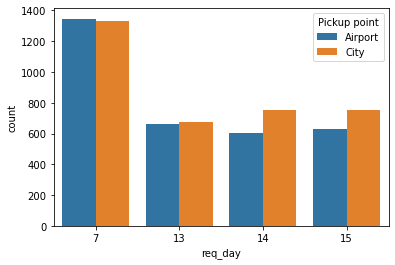

In [35]:
sns.countplot(x="req_day",data=df,hue="Pickup point")
plt.show()

C:\Users\sajan\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


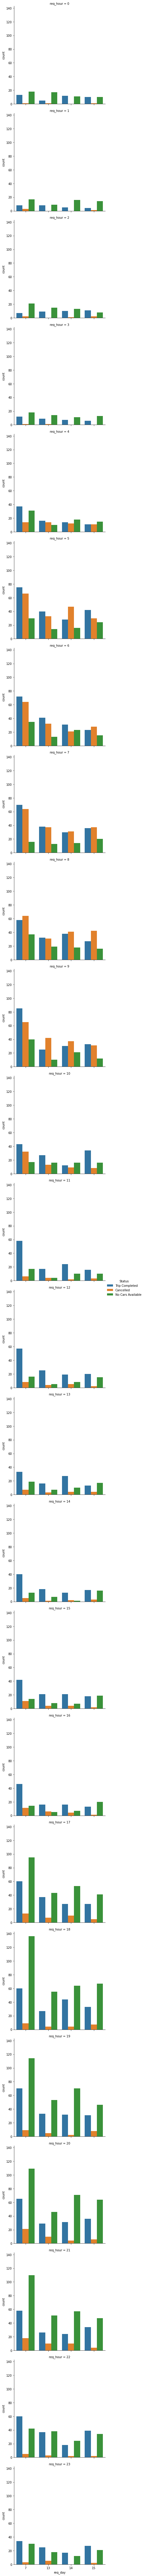

In [36]:
sns.factorplot(x="req_day",row="req_hour",data=df,kind="count",hue="Status")

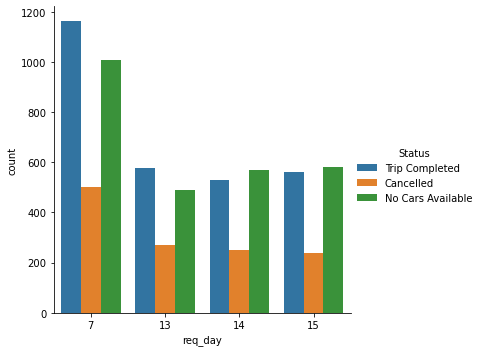

In [37]:
sns.factorplot(x="req_day",data=df,kind="count",hue="Status")

In [38]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-07-11 13:00:00,11,7
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-07-11 18:47:00,17,7
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-07-12 09:58:00,9,7
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-07-12 22:03:00,21,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


In [39]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'req_hour', 'req_day'],
      dtype='object')

In [40]:
df.index

RangeIndex(start=0, stop=6745, step=1)

In [68]:
<5           "Pre_morning"
5<=x<10   == "Morning Rush"
10<=x<17     'Day_time'
17<=x<22     "Evening rush"
else         "Late night"

SyntaxError: invalid syntax (<ipython-input-68-3c04b0994cf6>, line 1)

In [69]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-07-11 13:00:00,11,7,Day_Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-07-11 18:47:00,17,7,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-07-12 09:58:00,9,7,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-07-12 22:03:00,21,7,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night


In [74]:
df["sajana_slot"]=0

In [75]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,time,sajana_slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-07-11 13:00:00,11,7,Day_Time,0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-07-11 18:47:00,17,7,Evening_Rush,0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-07-12 09:58:00,9,7,Morning_Rush,0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-07-12 22:03:00,21,7,Evening_Rush,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush,0
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night,0


In [ ]:
<5           "Pre_morning"
5<=x<10   == "Morning Rush"
10<=x<17     'Day_time'
17<=x<22     "Evening rush"
else         "Late night"

In [82]:
j=0
for i in df["req_hour"]:
    if df.iloc[j,6]<5:
        df.iloc[j,9]="Pre_morning"
    elif 5<df.iloc[j,6]<10:
        df.iloc[j,9]="Morning Rush"
    elif 10<df.iloc[j,6]<17:
        df.iloc[j,9]="Day_time"
    elif 17<df.iloc[j,6]<22:
        df.iloc[j,9]="Evening rush"
    else:
        df.iloc[j,9]="Late night"
    j=j+1    

In [83]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,time,sajana_slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-07-11 13:00:00,11,7,Day_Time,Day_time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-07-11 18:47:00,17,7,Evening_Rush,Late night
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-07-12 09:58:00,9,7,Morning_Rush,Morning Rush
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-07-12 22:03:00,21,7,Evening_Rush,Evening rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush,Morning Rush
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night,Late night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night,Late night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night,Late night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night,Late night


In [ ]:
j=0
for i in df["req_hour"]:
    if df.iloc[j,6]<5:
        df.iloc[j,8]="Pre_Morning"
    elif 5<=df.iloc[j,6]<10:
        df.iloc[j,8]="Morning_Rush"
        
    elif 10<=df.iloc[j,6]<17:
        df.iloc[j,8]="Day_Time"
        
    elif 17<=df.iloc[j,6]<22:
        df.iloc[j,8]="Evening_Rush"
    else:
        df.iloc[j,8]="Late_Night"
    j=j+1

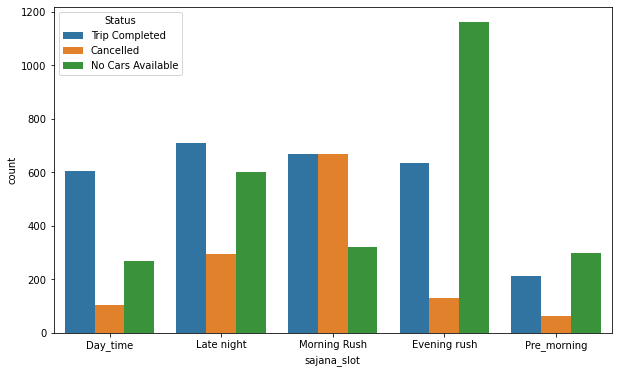

In [90]:
plt.figure(figsize=(10,6))
sns.countplot(x="sajana_slot",data=df,hue="Status")
plt.show()

In [91]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,time,sajana_slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-07-11 13:00:00,11,7,Day_Time,Day_time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-07-11 18:47:00,17,7,Evening_Rush,Late night
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-07-12 09:58:00,9,7,Morning_Rush,Morning Rush
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-07-12 22:03:00,21,7,Evening_Rush,Evening rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush,Morning Rush
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night,Late night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night,Late night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night,Late night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night,Late night


In [123]:
dfsajana_slot=df[df["sajana_slot"]=="Morning Rush"]

In [130]:
dfsajana_slot=df[df["sajana_slot"]=="Evening_Rush"]

In [131]:
dfsajana_slot

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,time,sajana_slot


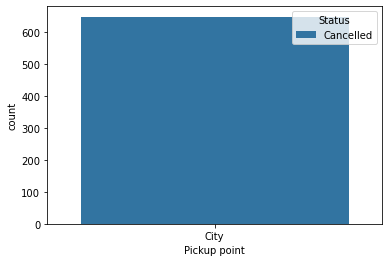

In [124]:
sns.countplot(x="Pickup point",data=dfsajana_slot,hue="Status")
plt.show()

In [104]:
df_city_status=dfsajana_slot.loc[(dfsajana_slot["Pickup point"]=="City") & (dfsajana_slot["Status"]=="Cancelled")]

In [113]:
df_city_status.shape[0]

648

In [108]:
df_airport_status=dfsajana_slot.loc[(dfsajana_slot["Pickup point"]=="Airport") & (dfsajana_slot["Status"]=="Cancelled")]

In [114]:
df_airport_status.shape[0]

19

# Supply and demand